In [20]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [21]:
visitor = pd.read_csv('data/visitor.csv')
visitor.head()

,기준년월,행정동명,방문자 구분,방문자 수,시설이름,시도,시군,지정년도
0,202304,효령면,외지인방문자(b),114258,사유원,대구광역시,군위군,2024
1,202304,효령면,전체방문자(a+b),173660,사유원,대구광역시,군위군,2024
2,202304,효령면,현지인방문자(a),59402,사유원,대구광역시,군위군,2024
3,202305,효령면,외지인방문자(b),120988,사유원,대구광역시,군위군,2024
4,202305,효령면,전체방문자(a+b),183386,사유원,대구광역시,군위군,2024


In [22]:
sort_rename = {
    '외지인방문자(b)' : '외지인',
    '전체방문자(a+b)' : '한국인',
    '현지인방문자(a)' : '현지인',
    '외국인방문객' : '외국인'
}

visitor['방문자 구분'] = visitor['방문자 구분'].replace(sort_rename) 
visitor.head()

# 기준년월 문자형
visitor['기준년월'] = visitor['기준년월'].astype('str')
visitor['기준년월'].dtype

dtype('O')

In [23]:
visitor['지정년도'] = visitor['지정년도'].astype('Int64')
visitor.head()

,기준년월,행정동명,방문자 구분,방문자 수,시설이름,시도,시군,지정년도
0,202304,효령면,외지인,114258,사유원,대구광역시,군위군,2024
1,202304,효령면,한국인,173660,사유원,대구광역시,군위군,2024
2,202304,효령면,현지인,59402,사유원,대구광역시,군위군,2024
3,202305,효령면,외지인,120988,사유원,대구광역시,군위군,2024
4,202305,효령면,한국인,183386,사유원,대구광역시,군위군,2024


In [24]:
visitor.isna().sum()

기준년월      0
행정동명      0
방문자 구분    0
방문자 수     0
시설이름      0
시도        0
시군        0
지정년도      0
dtype: int64

In [25]:
visitor[['시설이름', '지정년도']].drop_duplicates()

,시설이름,지정년도
0,사유원,2024
96,한국전통문화체험관,2024
192,소백산 생태탐방원,2024
288,미리내 힐빙클럽,2024
384,오크밸리,2024
480,클럽디오아시스,2024
576,금풍양조장,2024
672,경원재,2024
768,완도해양치유센터,2024
864,쉴랜드,2024


방문자 구분   외국인     외지인     한국인    현지인
기준년월                               
202304  1140  114258  173660  59402
202305  1184  120988  183386  62398
202306   834  104556  155141  50586
202307   903  111265  159131  47866
202308  1177  115549  165350  49802
202309   997  146475  192871  46396
202310  1205  119707  178482  58776
202311   742   96656  154696  58040
202312   745   93600  145614  52014
202401   451   85113  138512  53400
202402   799  107212  155526  48314
202403   562  109462  164462  54999
202404   794  108874  162960  54086
202405   856  121216  180733  59518
202406   823  113813  172960  59146
202407   645  105878  161472  55594
202408   920  114695  167412  52717
202409   863  148512  207081  58569
202410  1416  110968  170496  59528
202411  1239  103246  157584  54338
202412   878   91024  146212  55188
202501   579  106306  158599  52294
202502   440   75432  125010  49578
202503   703  106880  162050  55170


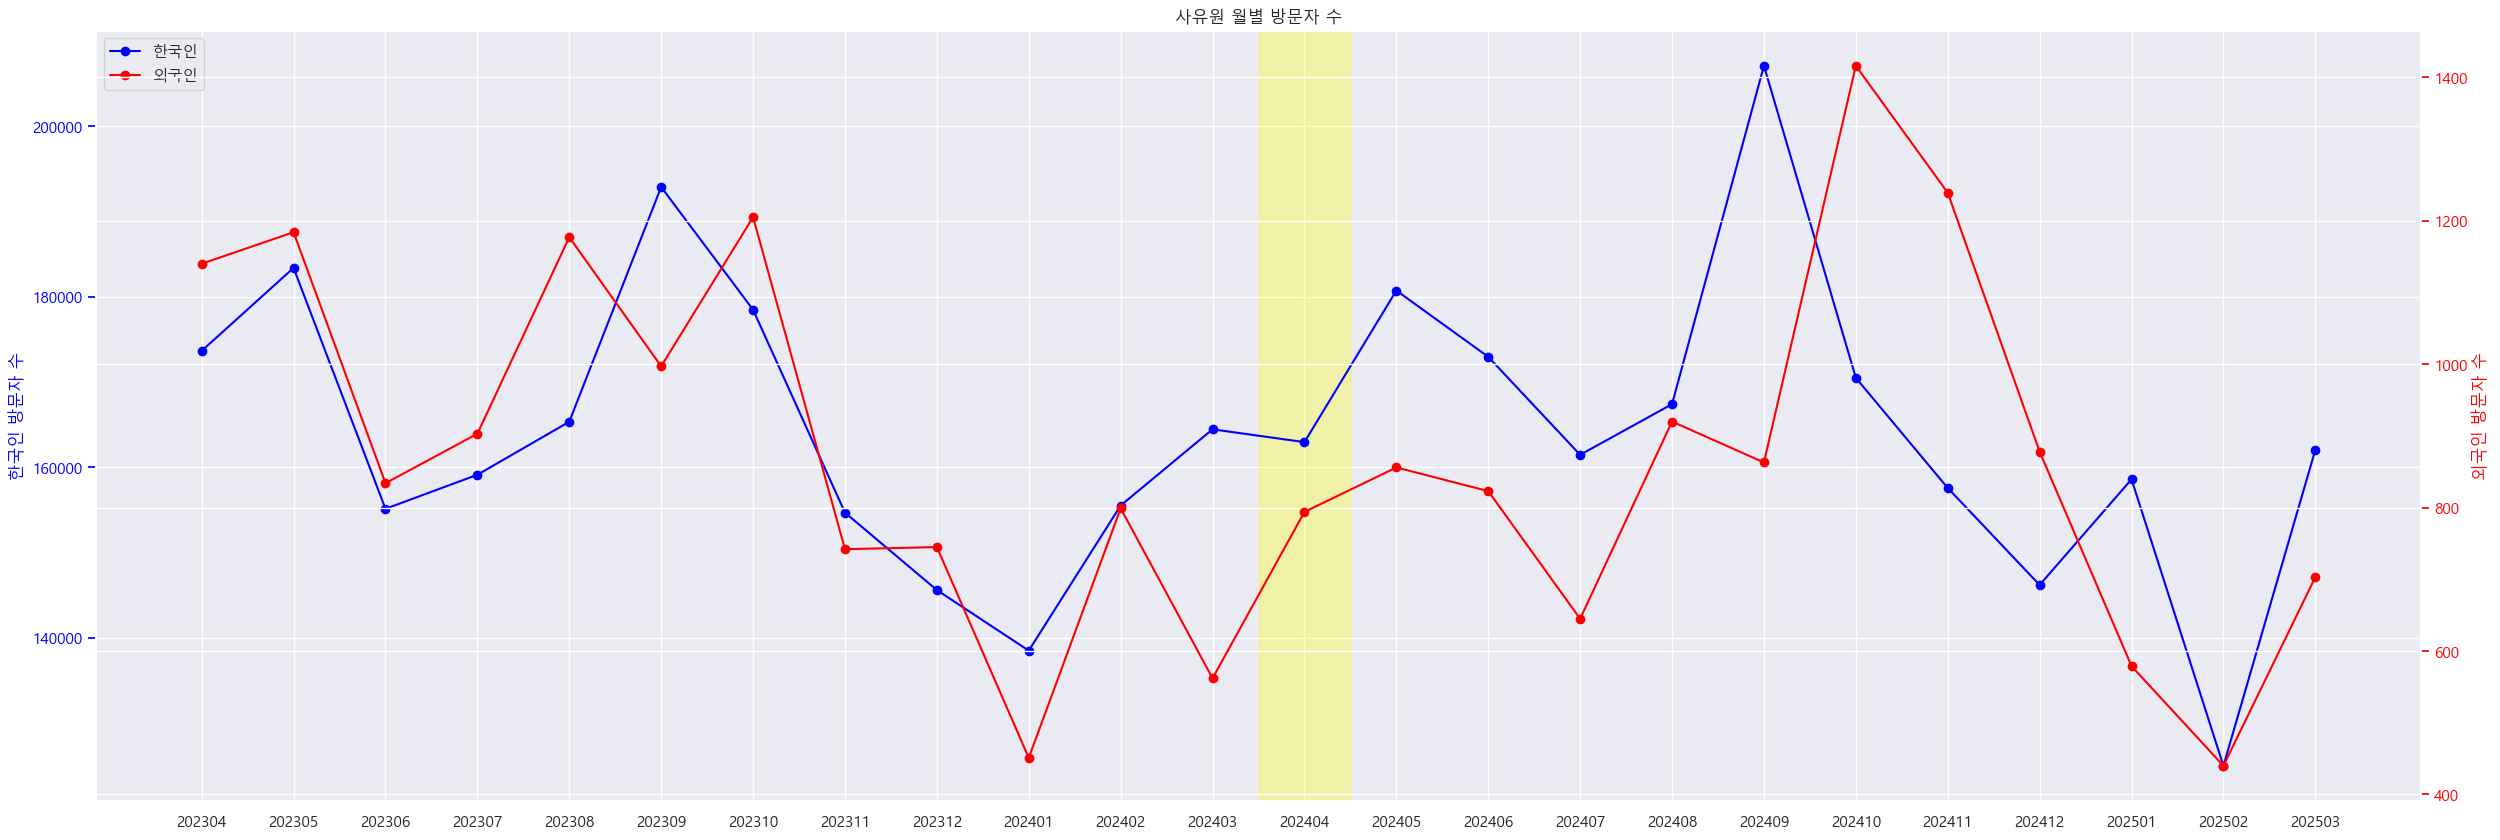

In [26]:
# 사유원
sy = visitor[visitor['시설이름'] == '사유원']
monthly_visitor = (
    sy.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분',values='방문자 수')
    .astype(int)
)
print(monthly_visitor)

fig, ax1 = plt.subplots(figsize=(30, 10))
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# 오른쪽 y축 생성
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 그래프 제목
plt.title('사유원 월별 방문자 수')

highlight = '202404'

# 위치 찾기
pos = list(monthly_visitor.index).index(highlight)

ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)


# 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


방문자 구분   외국인     외지인     한국인     현지인
기준년월                                
202304  1014  132465  574837  442372
202305   858  137914  598626  460712
202306   586  140291  572849  432558
202307   799  144617  555268  410652
202308   947  146017  566636  420619
202309  1014  164916  591448  426531
202310  1062  151798  593600  441802
202311   731  142362  578512  436149
202312   638  159558  586848  427290
202401   609  144518  488068  343550
202402   541  161924  478986  317062
202403   911  200018  594797  394779
202404  1019  136689  498316  361627
202405   963  148365  516838  368473
202406  1177  153752  538276  384524
202407  1543  149166  509936  360770
202408  1255  157300  513622  356321
202409   982  181006  561498  380492
202410   992  163716  596890  433174
202411  1171  161318  609735  448416
202412   747  169449  618219  448770
202501   588  168819  572166  403347
202502   569  162676  550928  388252
202503   958  204617  663974  459358


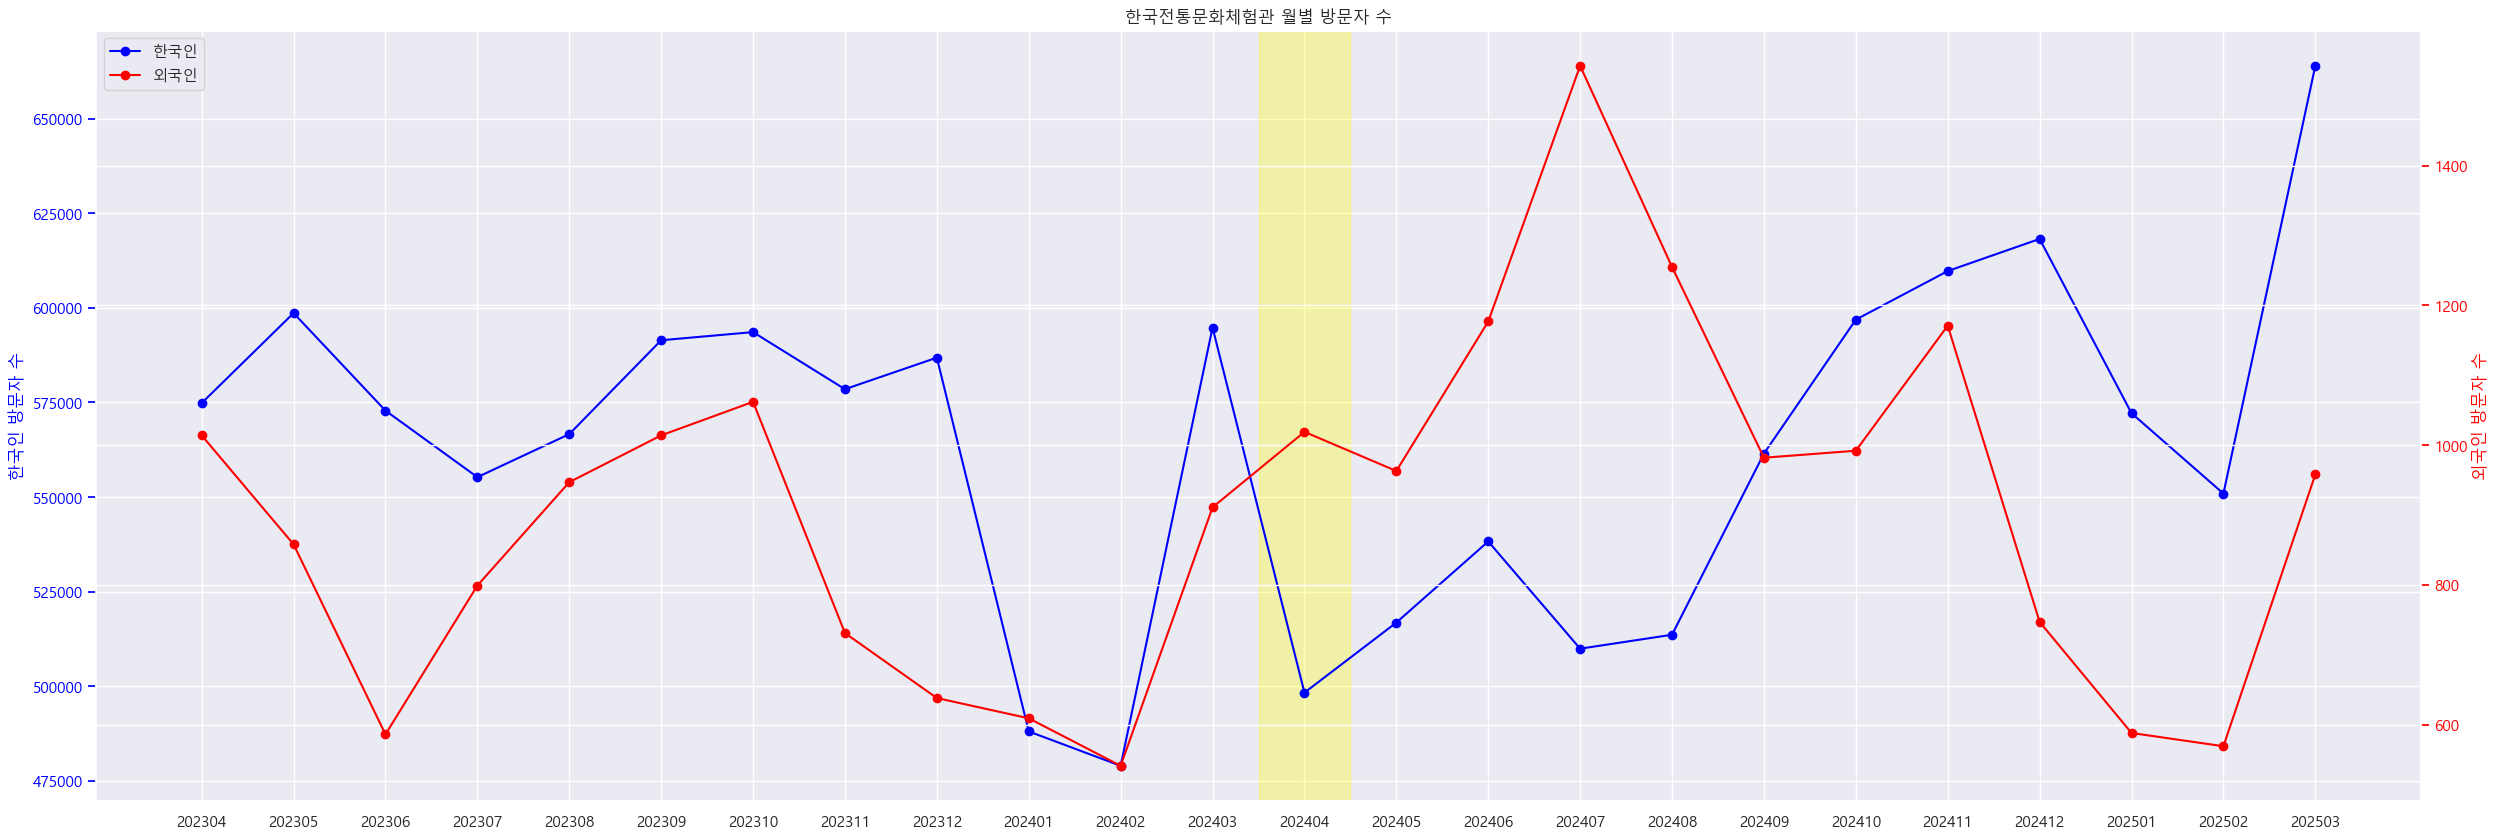

In [28]:
# 한국전통문화체험관
hk = visitor[visitor['시설이름'] == '한국전통문화체험관']
monthly_visitor = (
    hk.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분',values='방문자 수')
    .astype(int)
)
print(monthly_visitor)

fig, ax1 = plt.subplots(figsize=(30, 10))
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# 오른쪽 y축 생성
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 그래프 제목
plt.title('한국전통문화체험관 월별 방문자 수')

highlight = '202404'

# 위치 찾기
pos = list(monthly_visitor.index).index(highlight)

ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)


# 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


방문자 구분  외국인    외지인    한국인    현지인
기준년월                            
202304  288  17941  60588  42648
202305  389  20590  67830  47240
202306  209  15925  55888  39963
202307   73  18249  56329  38080
202308  282  20394  61194  40800
202309  137  30373  75422  45048
202310  151  22659  69262  46602
202311   95  18232  60686  42455
202312  173  14574  50841  36267
202401   64  11914  46512  34598
202402   52  19404  57197  37793
202403   78  14676  57064  42388
202404  243  18389  66490  48100
202405  200  23320  73997  50676
202406  126  18074  64771  46697
202407  208  19184  64540  45356
202408  190  23905  69276  45370
202409  142  25942  72954  47012
202410  187  20174  66504  46330
202411   91  18406  60851  42444
202412   37  14164  50768  36603
202501   13  18578  52542  33964
202502    6  12604  46596  33992
202503  143  17846  59010  41164


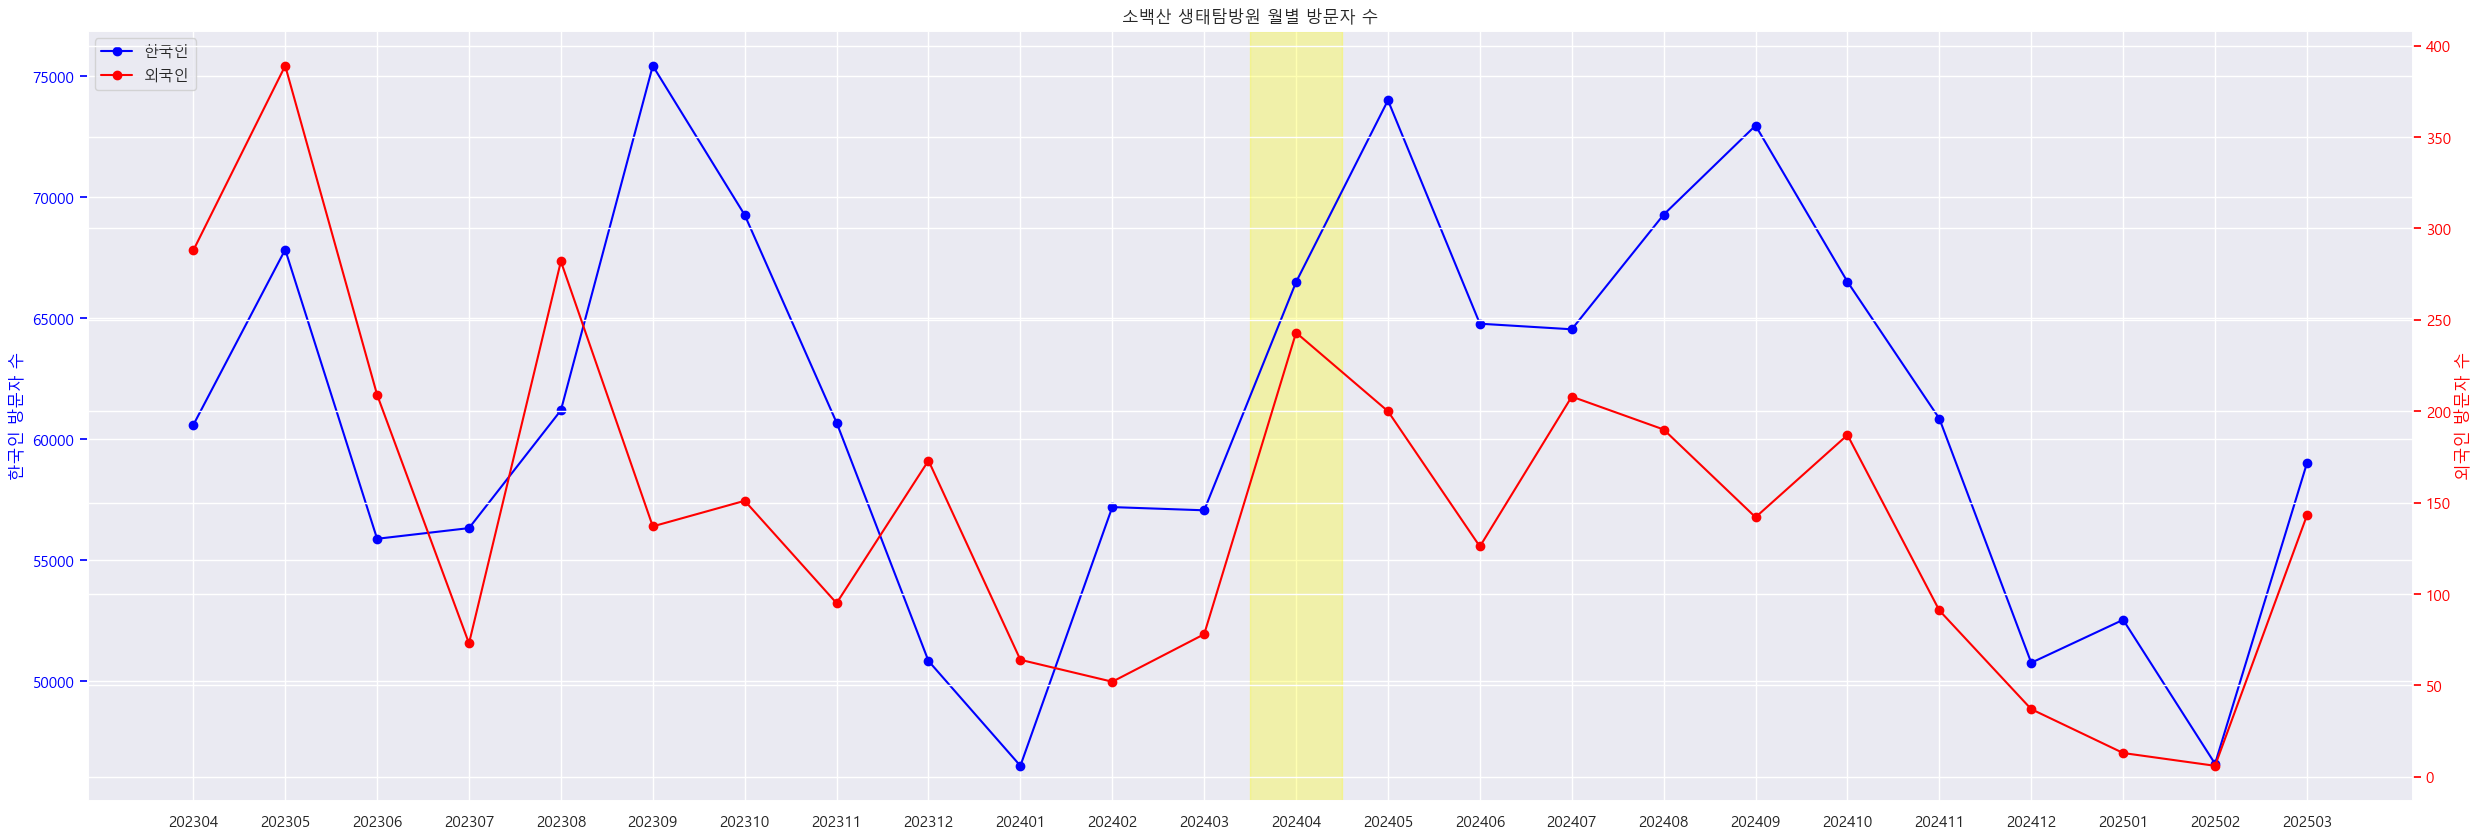

In [29]:
# 소백산 생태탐방원
sbs = visitor[visitor['시설이름'] == '소백산 생태탐방원']
monthly_visitor = (
    sbs.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분',values='방문자 수')
    .astype(int)
)
print(monthly_visitor)

fig, ax1 = plt.subplots(figsize=(30, 10))
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# 오른쪽 y축 생성
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 그래프 제목
plt.title('소백산 생태탐방원 월별 방문자 수')

highlight = '202404'

# 위치 찾기
pos = list(monthly_visitor.index).index(highlight)

ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)


# 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


방문자 구분   외국인     외지인     한국인     현지인
기준년월                                
202304   994  154154  312288  158134
202305   768  150927  314727  163800
202306  1044  134813  298700  163888
202307  1014  136297  296720  160422
202308  1007  138215  287112  148897
202309   678  154098  309670  155572
202310   700  151627  317614  165988
202311   366  122416  277585  155169
202312   435  108720  264198  155477
202401   402   87766  222772  135006
202402   503  117996  253732  135737
202403   533  128614  281866  153251
202404  1210  145344  302855  157510
202405  1341  160832  336550  175718
202406  1219  146412  312686  166274
202407  1128  131348  294420  163072
202408  1110  151848  308042  156194
202409   798  159691  309092  149401
202410   812  166022  337869  171846
202411   619  129066  298417  169351
202412   541   95284  251150  155866
202501   351  113200  255490  142289
202502   287   84903  219082  134180
202503   845  135667  296716  161049


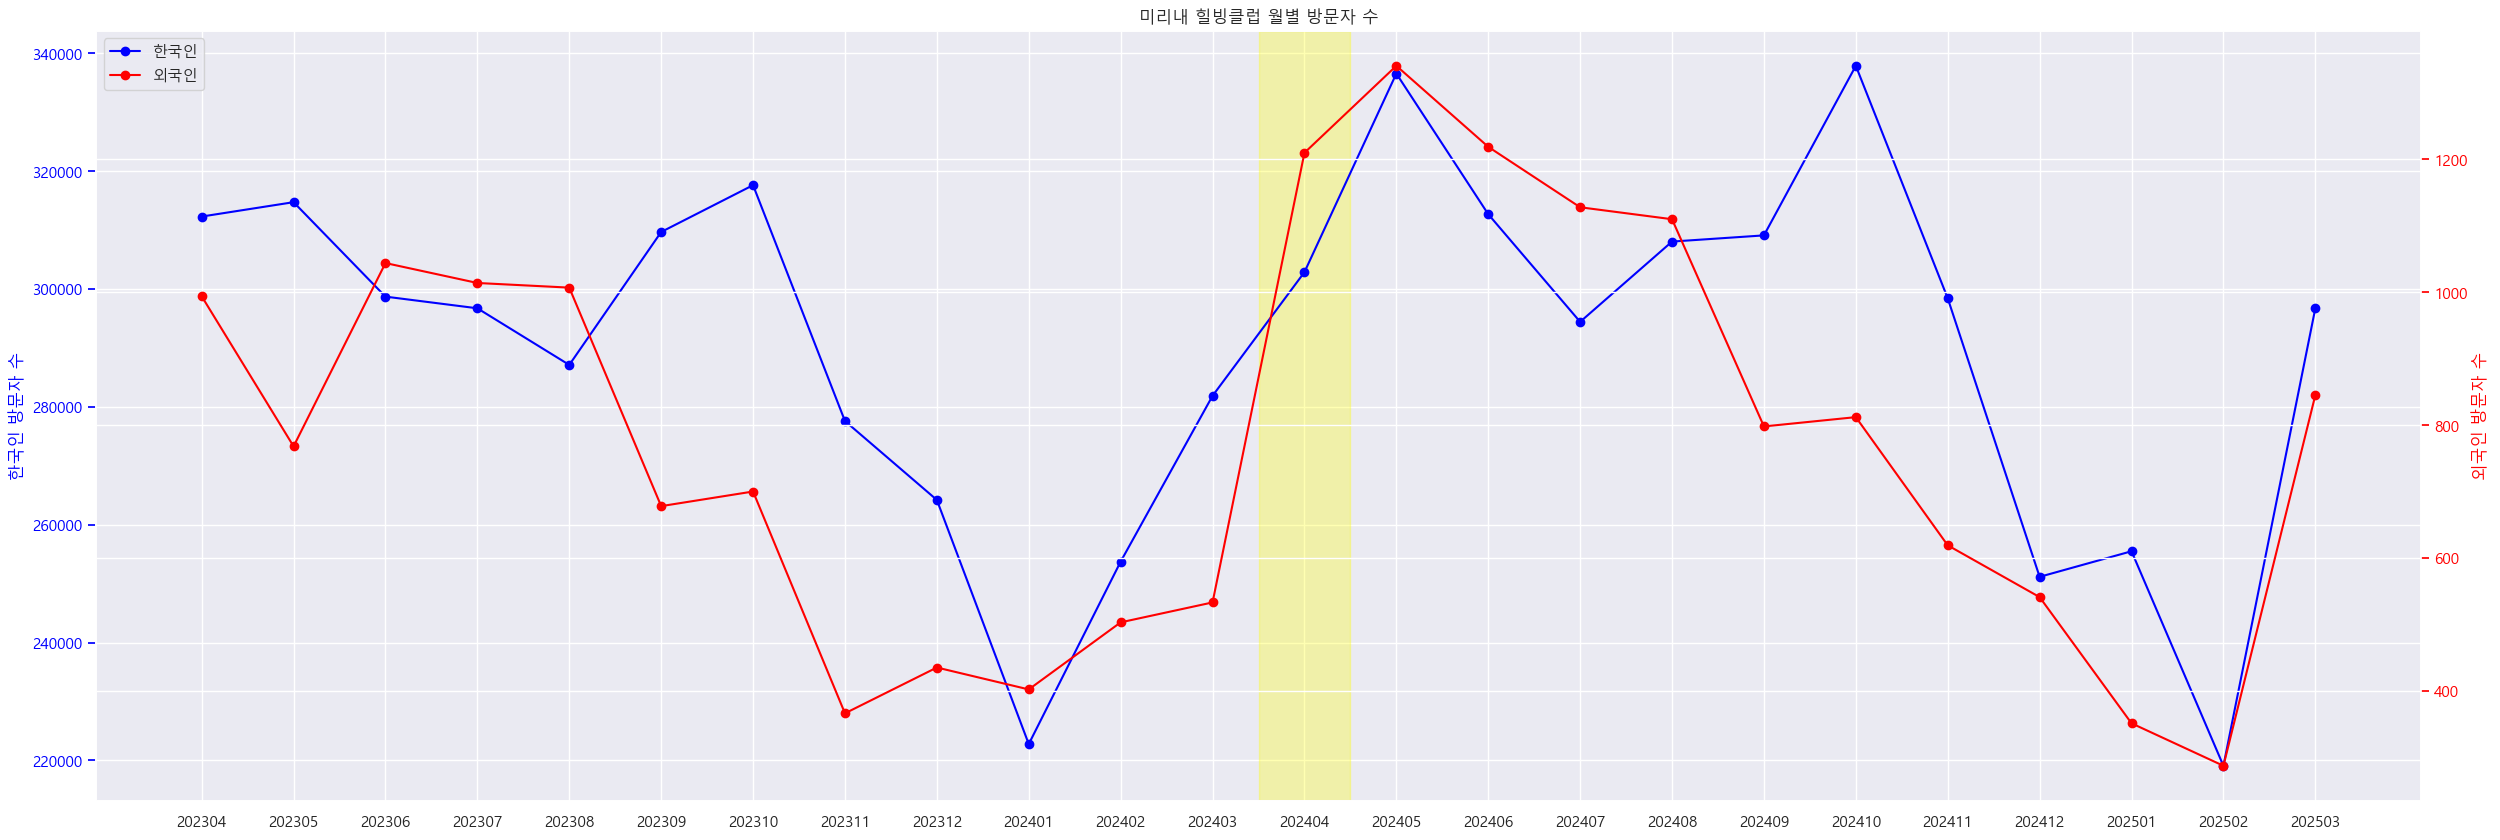

In [30]:
# 미리내 힐빙클럽
mrn = visitor[visitor['시설이름'] == '미리내 힐빙클럽']
monthly_visitor = (
    mrn.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분',values='방문자 수')
    .astype(int)
)
print(monthly_visitor)

fig, ax1 = plt.subplots(figsize=(30, 10))
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# 오른쪽 y축 생성
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 그래프 제목
plt.title('미리내 힐빙클럽 월별 방문자 수')

highlight = '202404'

# 위치 찾기
pos = list(monthly_visitor.index).index(highlight)

ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)


# 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


방문자 구분   외국인     외지인      한국인     현지인
기준년월                                 
202304  4338  365810  1011255  645446
202305  4238  395916  1101835  705918
202306  4709  385606  1074258  688653
202307  4825  369246  1056206  686959
202308  5268  411072  1095174  684103
202309  4485  384706  1032955  648249
202310  5517  492082  1182492  690410
202311  5783  381818  1027352  645533
202312  5550  357648   995558  637910
202401  4620  386967  1020044  633076
202402  4714  408810  1031793  622982
202403  3479  375893  1055716  679822
202404  3896  362369  1029161  666792
202405  3974  411722  1113049  701326
202406  4590  416986  1129572  712586
202407  4681  361000  1058914  697914
202408  3708  436758  1141774  705016
202409  4971  392052  1071665  679612
202410  5429  501190  1258173  756984
202411  3819  443394  1153873  710479
202412  4971  317208  1030596  713388
202501  4651  373894  1041614  667720
202502  3706  303706   951230  647524
202503  3638  369887  1107180  737292


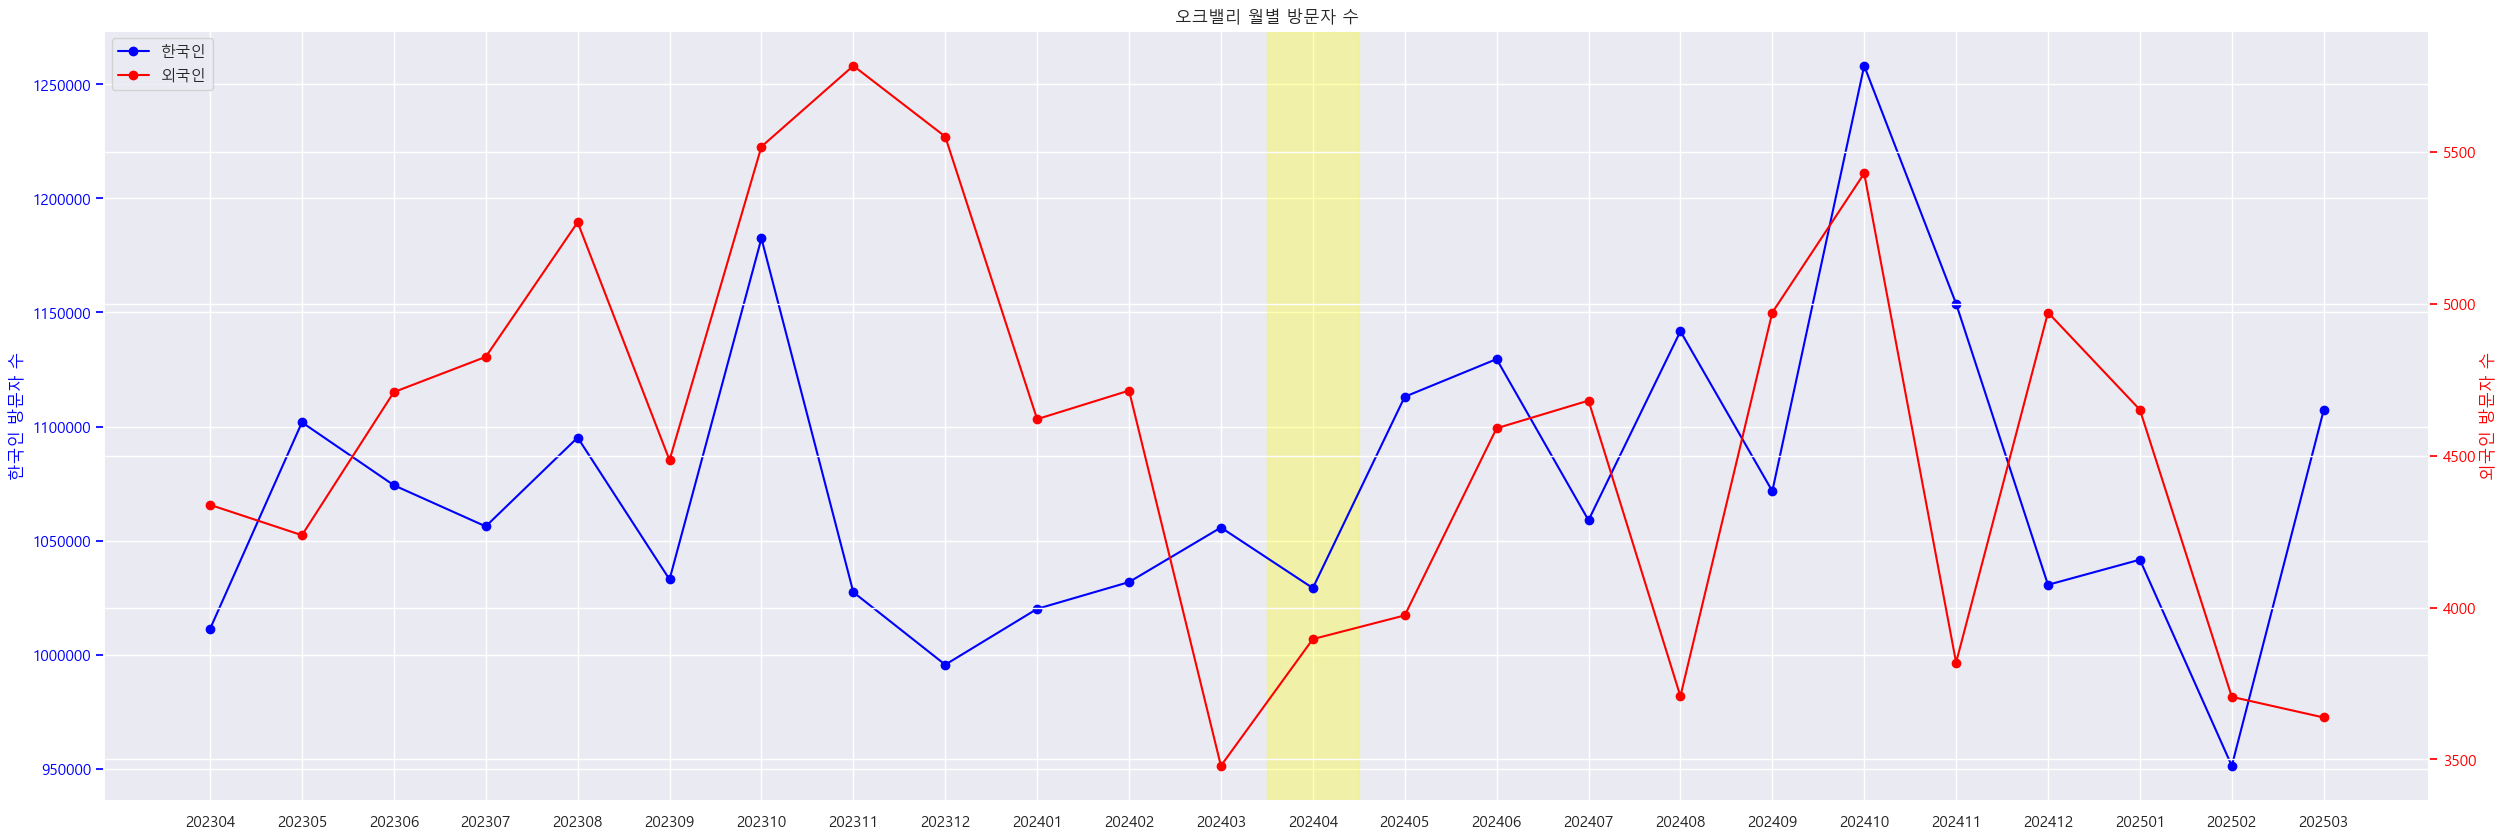

In [ ]:
# 1. '오크밸리' 데이터 필터링
ok = visitor[visitor['시설이름'] == '오크밸리']

# 2. 기준년월별 한국인/외국인 방문자 수 집계
monthly_visitor = (
    ok.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분', values='방문자 수')
    .astype(int)  # 정수로 변환
)

print(monthly_visitor)

# 3. 시각화 시작
fig, ax1 = plt.subplots(figsize=(30, 10))

# 왼쪽 y축: 한국인 방문자 수
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# y축 숫자 형식: 정수 고정
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')

# 오른쪽 y축: 외국인 방문자 수
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 오른쪽 y축도 정수 고정
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')

# 4. 그래프 제목
plt.title('오크밸리 월별 방문자 수')

# 5. 특정 기준년월(202404) 하이라이트
highlight = '202404'
pos = list(monthly_visitor.index).index(highlight)
ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)

# 6. 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 7. 출력
plt.show()


방문자 구분     외국인      외지인      한국인      현지인
기준년월                                     
202304  115836  1116714  2350156  1233442
202305  103229  1228650  2525436  1296785
202306  115001  1208630  2469436  1260805
202307  100352  1351301  2659713  1308412
202308  104036  1479569  2788527  1308958
202309  130929  1074602  2323366  1248765
202310  169281  1165118  2478707  1313588
202311  123460  1022616  2274598  1251982
202312   91981  1237299  2501520  1264221
202401   71790  1169665  2478018  1308352
202402   90994  1098363  2280957  1182594
202403  138651  1024184  2290340  1266156
202404  190174   982758  2229244  1246486
202405  169328  1211798  2555476  1343678
202406  163822  1169178  2452604  1283426
202407  161613  1309564  2695623  1386060
202408  177704  1578154  2972518  1394365
202409  166285  1144868  2416418  1271550
202410  225952  1165171  2484444  1319272
202411  163545  1140024  2457304  1317281
202412  141067  1291854  2741193  1449340
202501  101387  1359810  2736944  

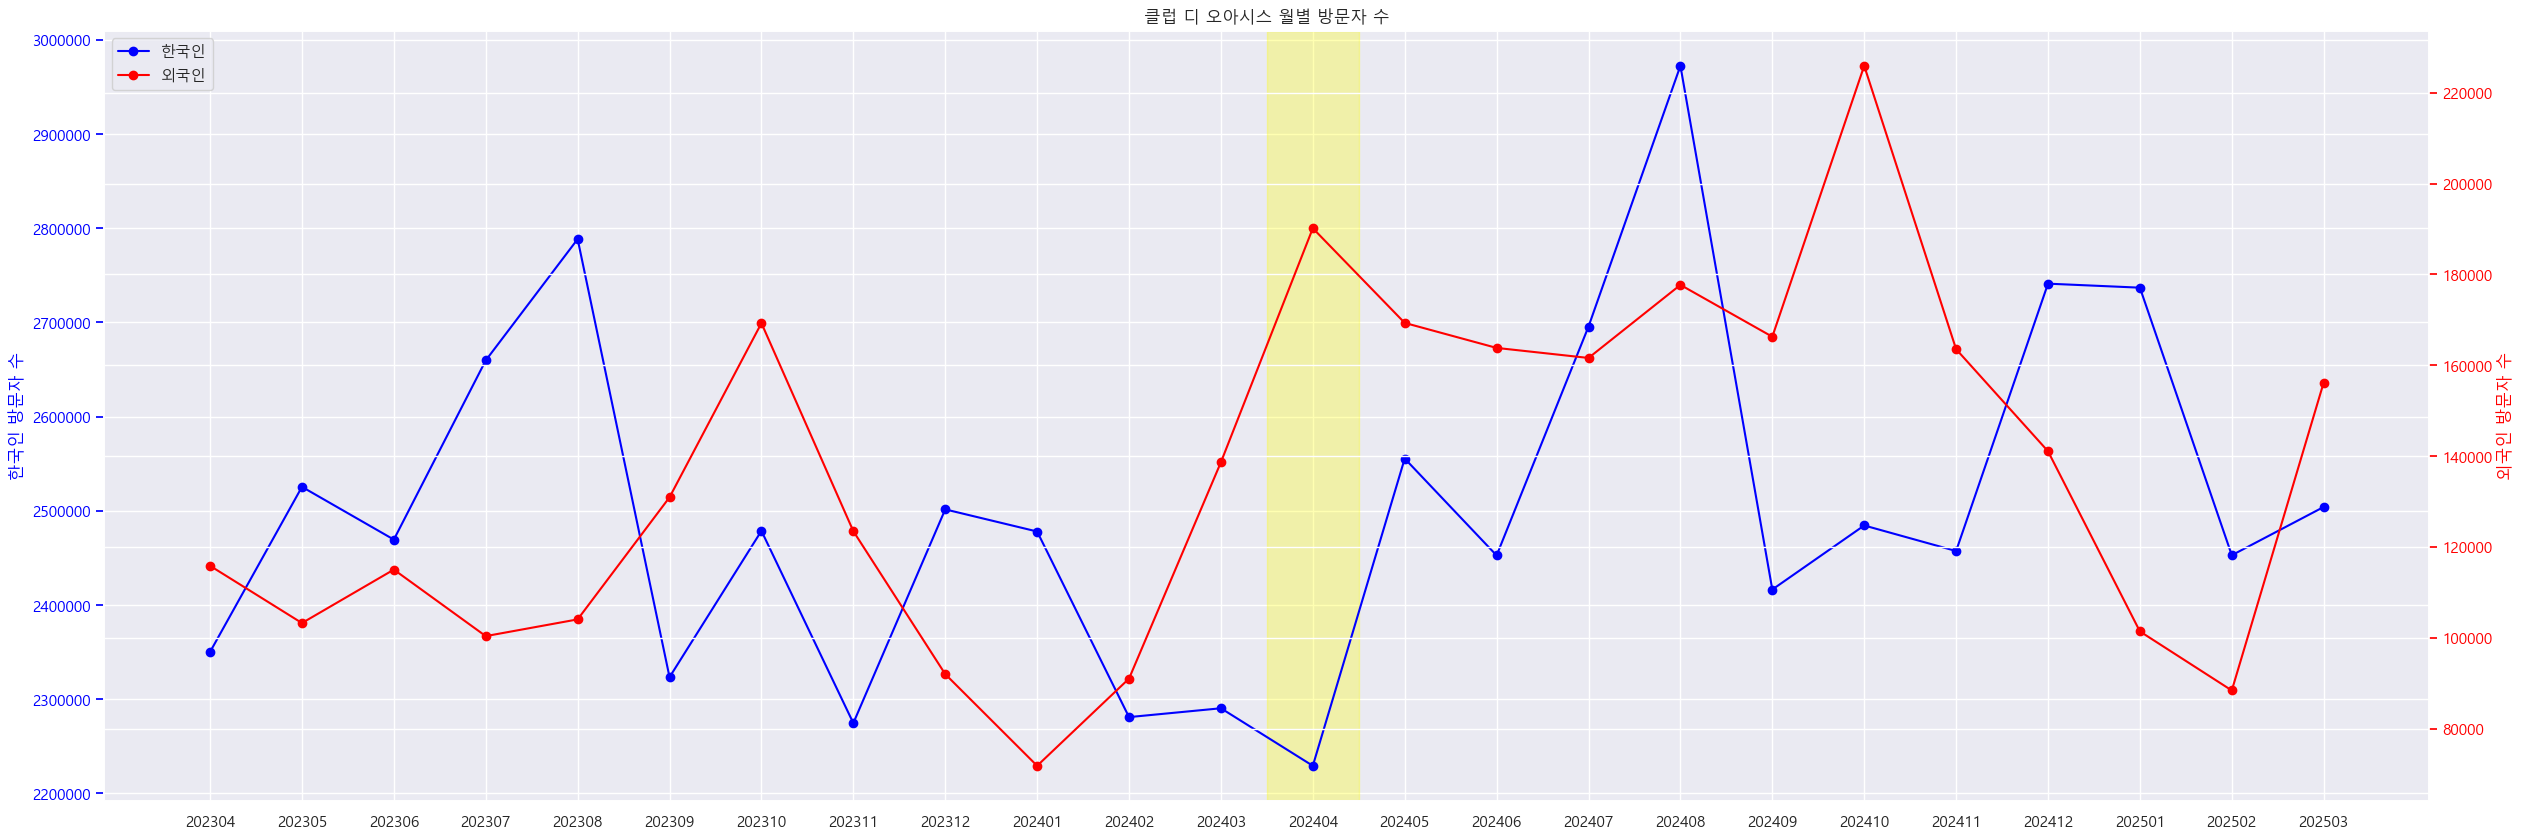

In [33]:
# 클럽 디 오아시스
cl = visitor[visitor['시설이름'] == '클럽디오아시스']

# 2. 기준년월별 한국인/외국인 방문자 수 집계
monthly_visitor = (
    cl.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분', values='방문자 수')
    .astype(int)  # 정수로 변환
)

print(monthly_visitor)

# 3. 시각화 시작
fig, ax1 = plt.subplots(figsize=(30, 10))

# 왼쪽 y축: 한국인 방문자 수
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# y축 숫자 형식: 정수 고정
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')

# 오른쪽 y축: 외국인 방문자 수
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 오른쪽 y축도 정수 고정
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')

# 4. 그래프 제목
plt.title('클럽 디 오아시스 월별 방문자 수')

# 5. 특정 기준년월(202404) 하이라이트
highlight = '202404'
pos = list(monthly_visitor.index).index(highlight)
ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)

# 6. 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 7. 출력
plt.show()


방문자 구분   외국인     외지인     한국인     현지인
기준년월                                
202304  4438  484183  759308  275124
202305  3953  520464  817943  297479
202306  4231  465258  757246  291988
202307  5585  427340  720996  293657
202308  7556  469836  785148  315312
202309  5778  506482  785617  279136
202310  5682  620896  912786  291890
202311  5187  394006  667706  273700
202312  4660  332472  616150  283678
202401  3849  325556  600824  275268
202402  4825  368067  618863  250796
202403  6763  413791  695040  281250
202404  8044  461864  748626  286762
202405  6411  500636  802308  301672
202406  6760  457992  738266  280273
202407  7378  358620  637024  278404
202408  9414  447440  713198  265758
202409  6044  497672  750698  253026
202410  7200  547575  811181  263606
202411  7090  395356  636444  241087
202412  5569  283059  518710  235652
202501  4509  321783  533788  212006
202502  4351  268776  476886  208110
202503  4628  418218  675462  257243


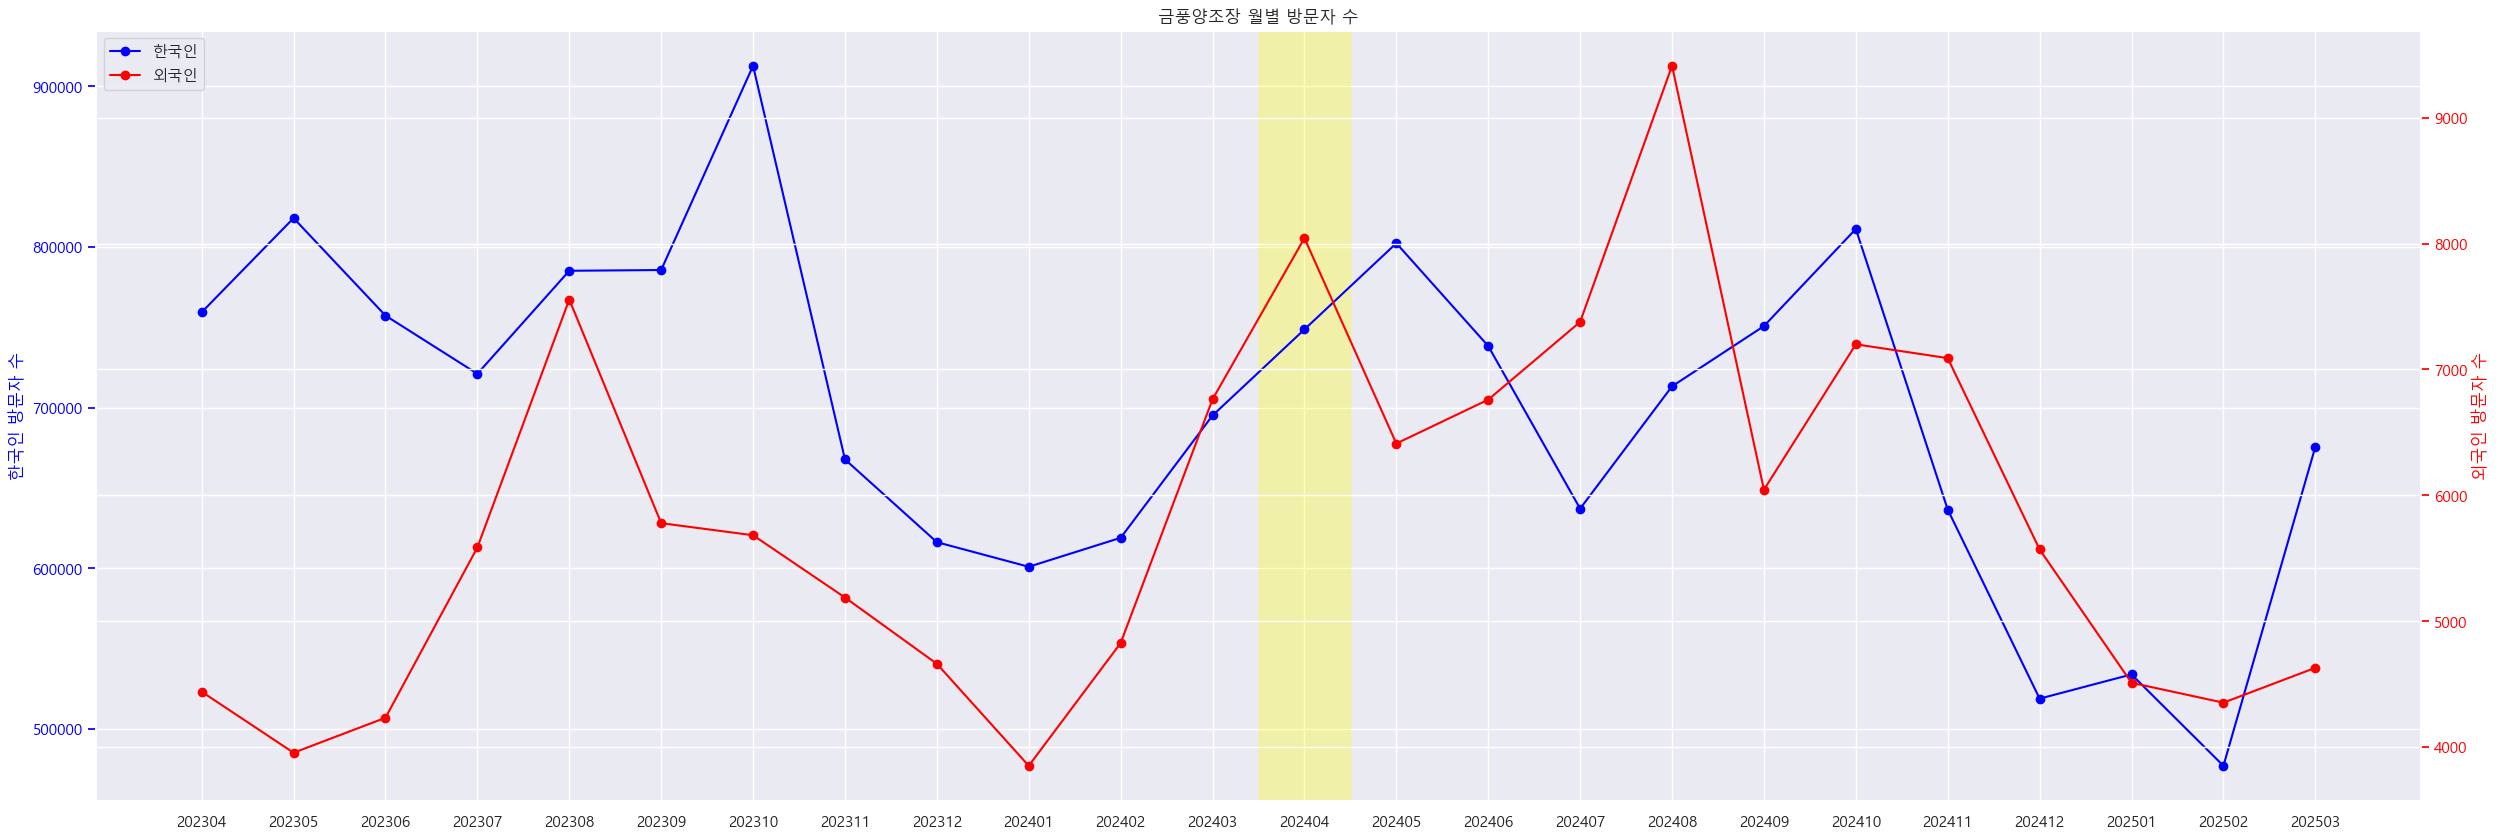

In [34]:
# 금풍양조장
gp = visitor[visitor['시설이름'] == '금풍양조장']

# 2. 기준년월별 한국인/외국인 방문자 수 집계
monthly_visitor = (
    gp.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분', values='방문자 수')
    .astype(int)  # 정수로 변환
)

print(monthly_visitor)

# 3. 시각화 시작
fig, ax1 = plt.subplots(figsize=(30, 10))

# 왼쪽 y축: 한국인 방문자 수
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# y축 숫자 형식: 정수 고정
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')

# 오른쪽 y축: 외국인 방문자 수
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 오른쪽 y축도 정수 고정
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')

# 4. 그래프 제목
plt.title('금풍양조장 월별 방문자 수')

# 5. 특정 기준년월(202404) 하이라이트
highlight = '202404'
pos = list(monthly_visitor.index).index(highlight)
ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)

# 6. 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 7. 출력
plt.show()


방문자 구분    외국인     외지인      한국인     현지인
기준년월                                  
202304  18369  401166  1052026  650860
202305  19314  433738  1138627  704890
202306  17292  378098  1064448  686350
202307  20284  366779  1091272  724493
202308  21699  437871  1163883  726012
202309  17816  384898  1093736  708838
202310  21367  350676  1101426  750750
202311  15770  278362   979934  701572
202312  12339  289212   956557  667345
202401  11976  274911   943358  668448
202402  14528  276944   900515  623570
202403  18103  311174  1011062  699888
202404  19112  308542  1067213  758670
202405  21651  334005  1151860  817856
202406  18188  332430  1165752  833322
202407  20326  314632  1072782  758149
202408  20662  455392  1229907  774515
202409  27667  332398  1062610  730212
202410  29666  294438  1029504  735066
202411  21178  251552   967351  715799
202412  15912  262073   957366  695292
202501  15285  265892   947194  681303
202502  13610  246022   902080  656058
202503  21158  294056  10

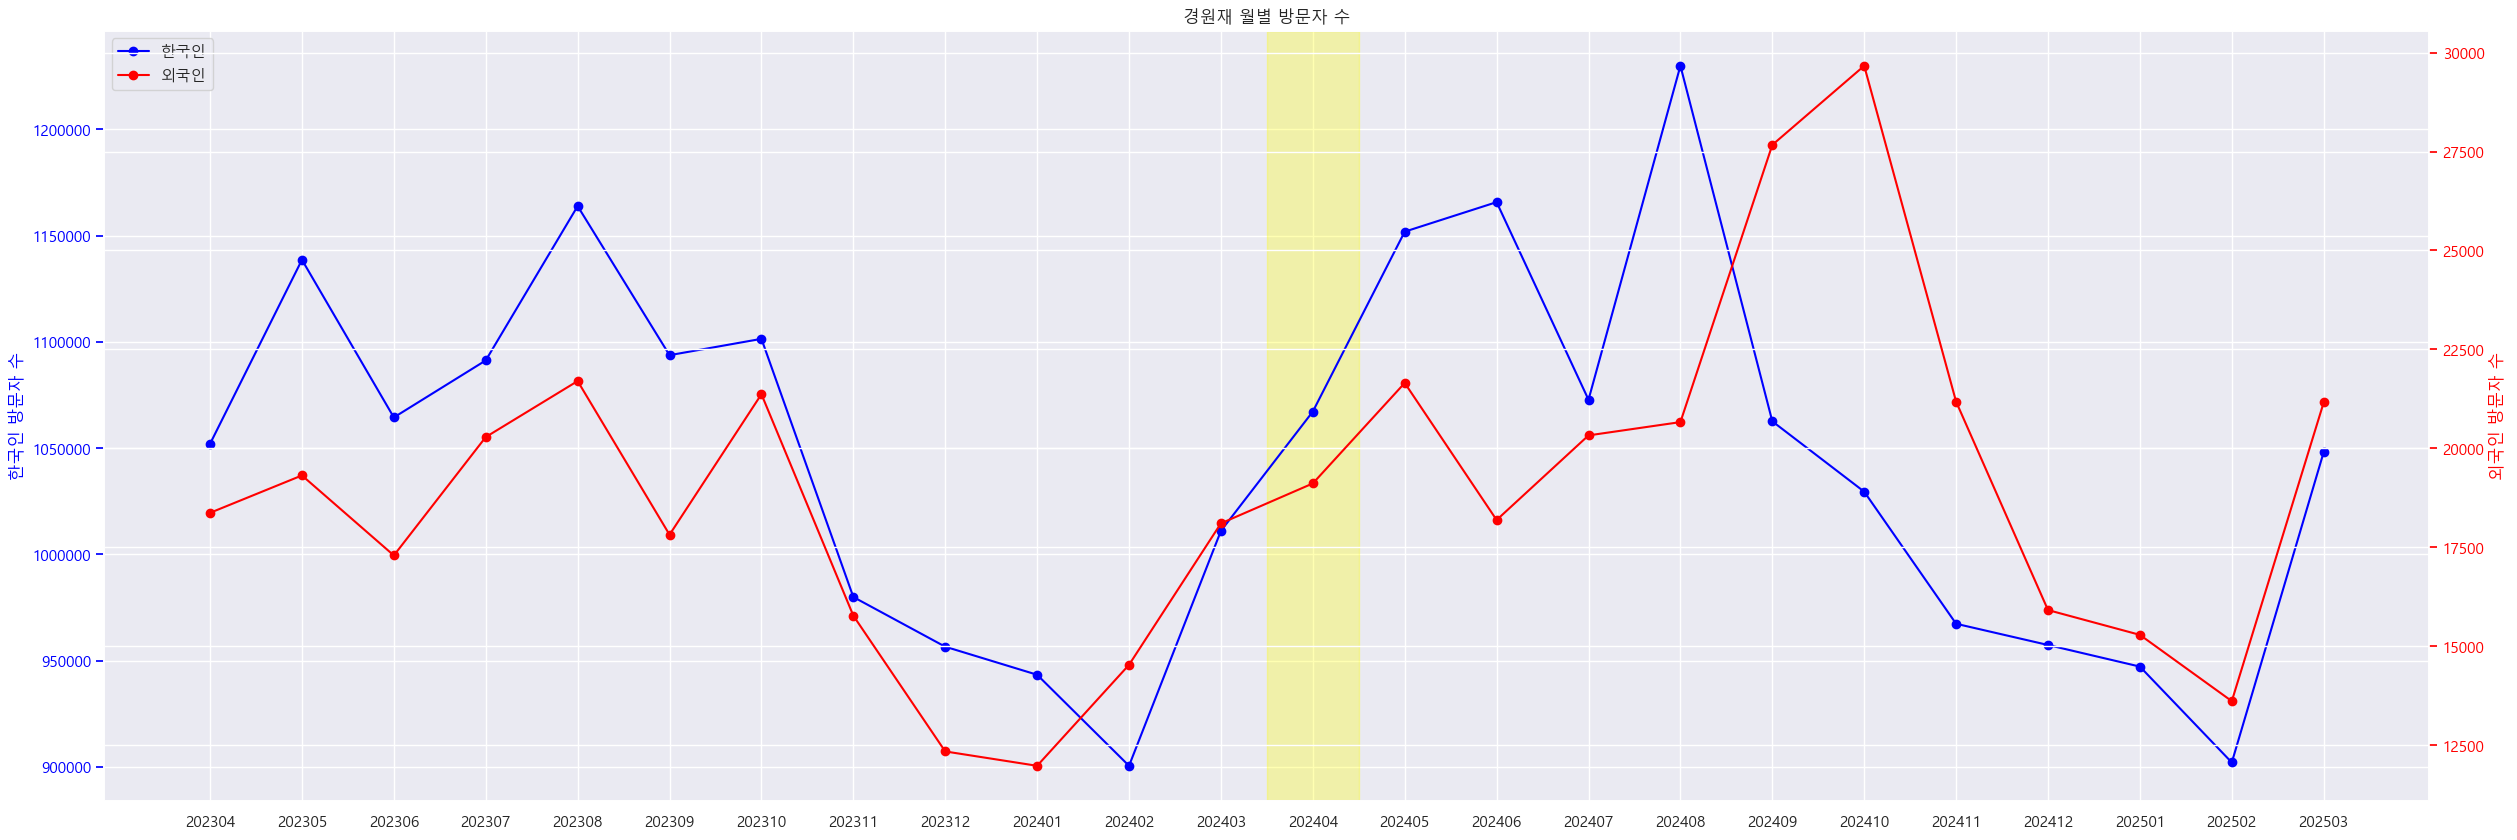

In [35]:
# 경원재
gwj = visitor[visitor['시설이름'] == '경원재']

# 2. 기준년월별 한국인/외국인 방문자 수 집계
monthly_visitor = (
    gwj.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분', values='방문자 수')
    .astype(int)  # 정수로 변환
)

print(monthly_visitor)

# 3. 시각화 시작
fig, ax1 = plt.subplots(figsize=(30, 10))

# 왼쪽 y축: 한국인 방문자 수
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# y축 숫자 형식: 정수 고정
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')

# 오른쪽 y축: 외국인 방문자 수
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 오른쪽 y축도 정수 고정
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')

# 4. 그래프 제목
plt.title('경원재 월별 방문자 수')

# 5. 특정 기준년월(202404) 하이라이트
highlight = '202404'
pos = list(monthly_visitor.index).index(highlight)
ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)

# 6. 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 7. 출력
plt.show()


방문자 구분   외국인     외지인     한국인     현지인
기준년월                                
202304  2273   56606  118552   61946
202305  2894   71852  144882   73031
202306  2992   59490  127078   67588
202307  2324   87969  160552   72583
202308  2367  120295  197256   76962
202309  2243  109410  204306   94896
202310  2372  124366  230346  105980
202311  2857   79468  176358   96890
202312  2667   80640  181710  101070
202401  2757   81417  182763  101346
202402  2640   83349  178241   94892
202403  3117   99340  230178  130837
202404  3274  136370  262630  126259
202405  4797  119304  255398  136094
202406  5421  102396  226884  124488
202407  4089  127190  263207  136017
202408  3880  178272  313922  135650
202409  3058  123487  251167  127680
202410  3221  107230  239998  132769
202411  3533   92648  212639  119990
202412  2879   84528  203242  118713
202501  2585  115864  230486  114622
202502  2031   64617  164416   99799
202503  3350   90534  205936  115402


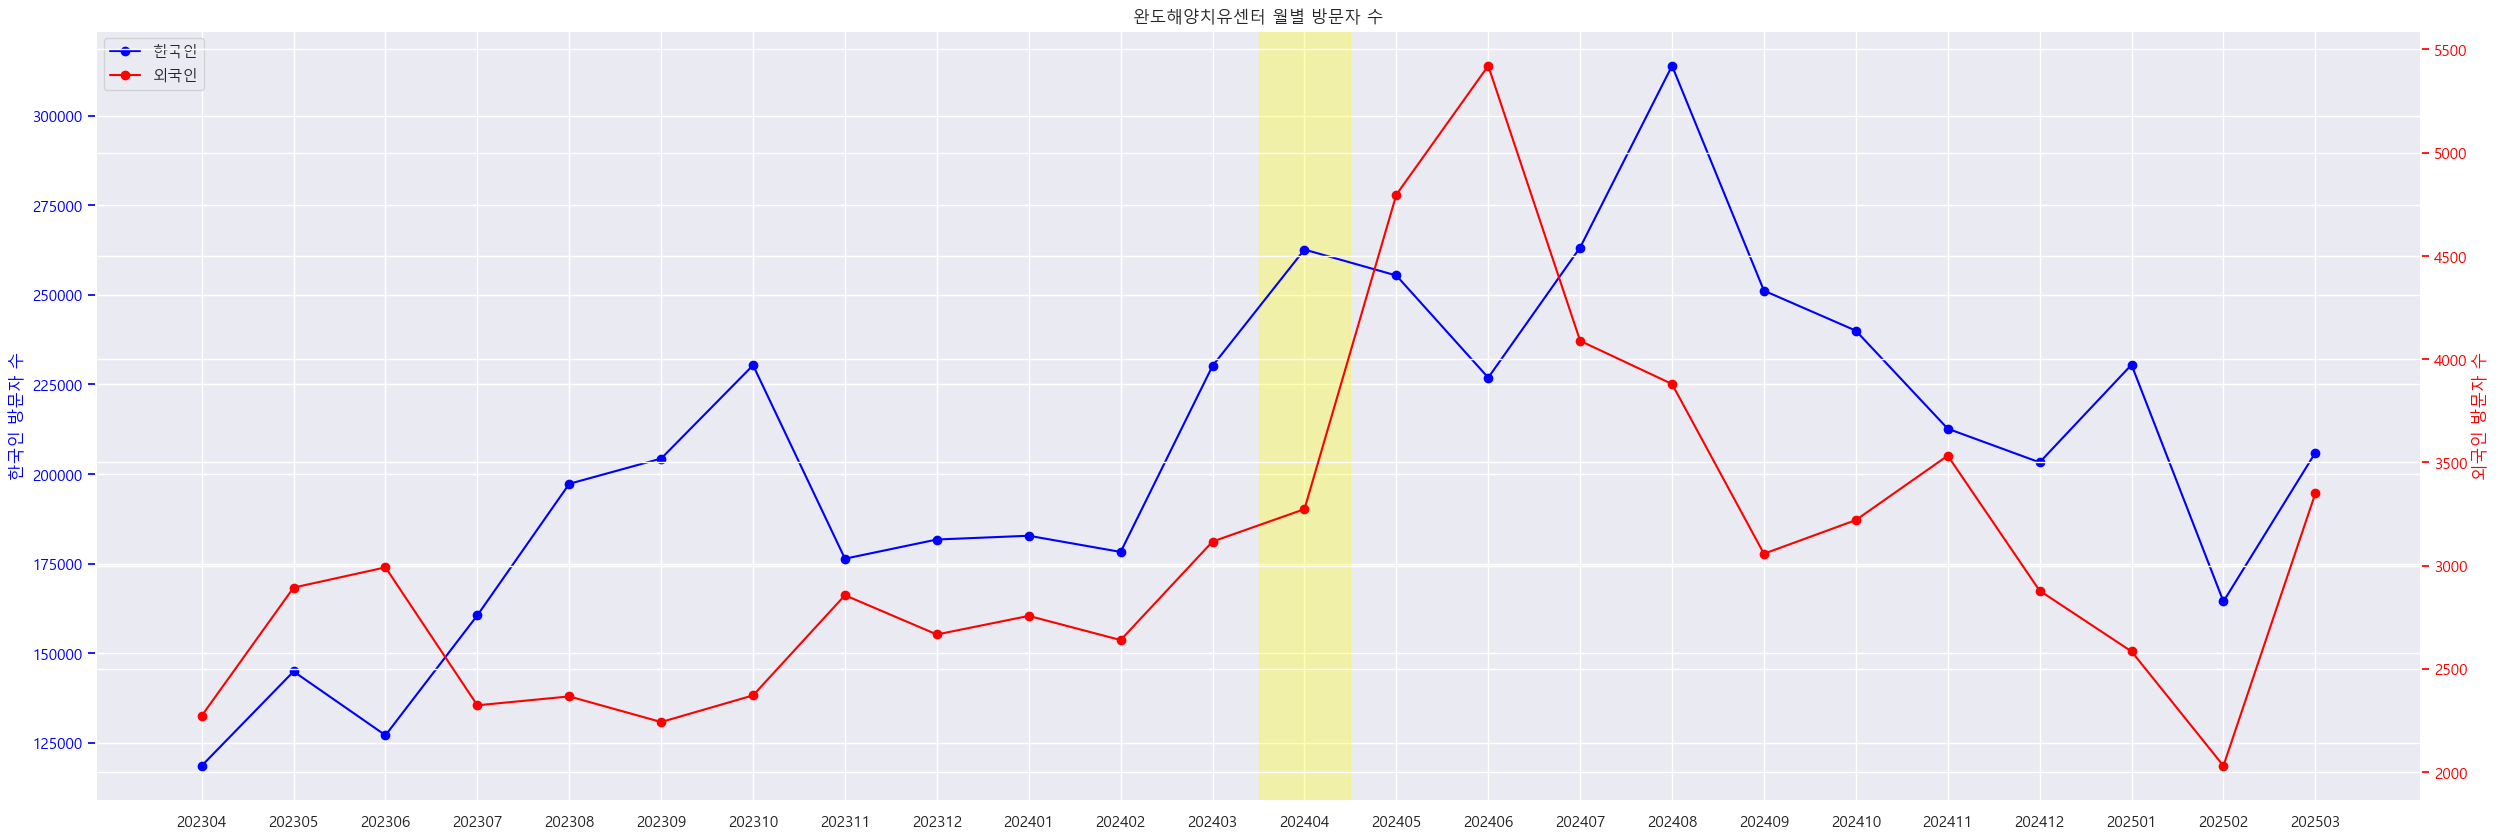

In [36]:
# 완도해양치유센터
wd = visitor[visitor['시설이름'] == '완도해양치유센터']

# 2. 기준년월별 한국인/외국인 방문자 수 집계
monthly_visitor = (
    wd.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분', values='방문자 수')
    .astype(int)  # 정수로 변환
)

print(monthly_visitor)

# 3. 시각화 시작
fig, ax1 = plt.subplots(figsize=(30, 10))

# 왼쪽 y축: 한국인 방문자 수
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# y축 숫자 형식: 정수 고정
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')

# 오른쪽 y축: 외국인 방문자 수
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 오른쪽 y축도 정수 고정
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')

# 4. 그래프 제목
plt.title('완도해양치유센터 월별 방문자 수')

# 5. 특정 기준년월(202404) 하이라이트
highlight = '202404'
pos = list(monthly_visitor.index).index(highlight)
ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)

# 6. 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 7. 출력
plt.show()


방문자 구분  외국인    외지인    한국인    현지인
기준년월                            
202304  136  17825  39872  22046
202305  191  17874  40876  23002
202306  164  16811  43183  26373
202307  143  14844  36799  21955
202308  144  15134  37201  22068
202309  327  20464  43449  22984
202310  105  15792  40274  24482
202311   84  14270  36988  22718
202312  237  11949  33285  21336
202401  278  10314  28780  18466
202402  150  17955  35462  17507
202403  117  15568  37356  21788
202404  243  16460  39774  23314
202405  276  18246  42312  24066
202406  202  15446  37446  22001
202407  131  14458  36424  21966
202408  531  14896  35410  20514
202409  210  20671  41926  21256
202410  278  16678  37772  21094
202411  141  14630  35917  21287
202412   86  11543  30058  18515
202501   72  15022  32480  17458
202502   88  10252  26117  15866
202503  373  15054  34248  19194


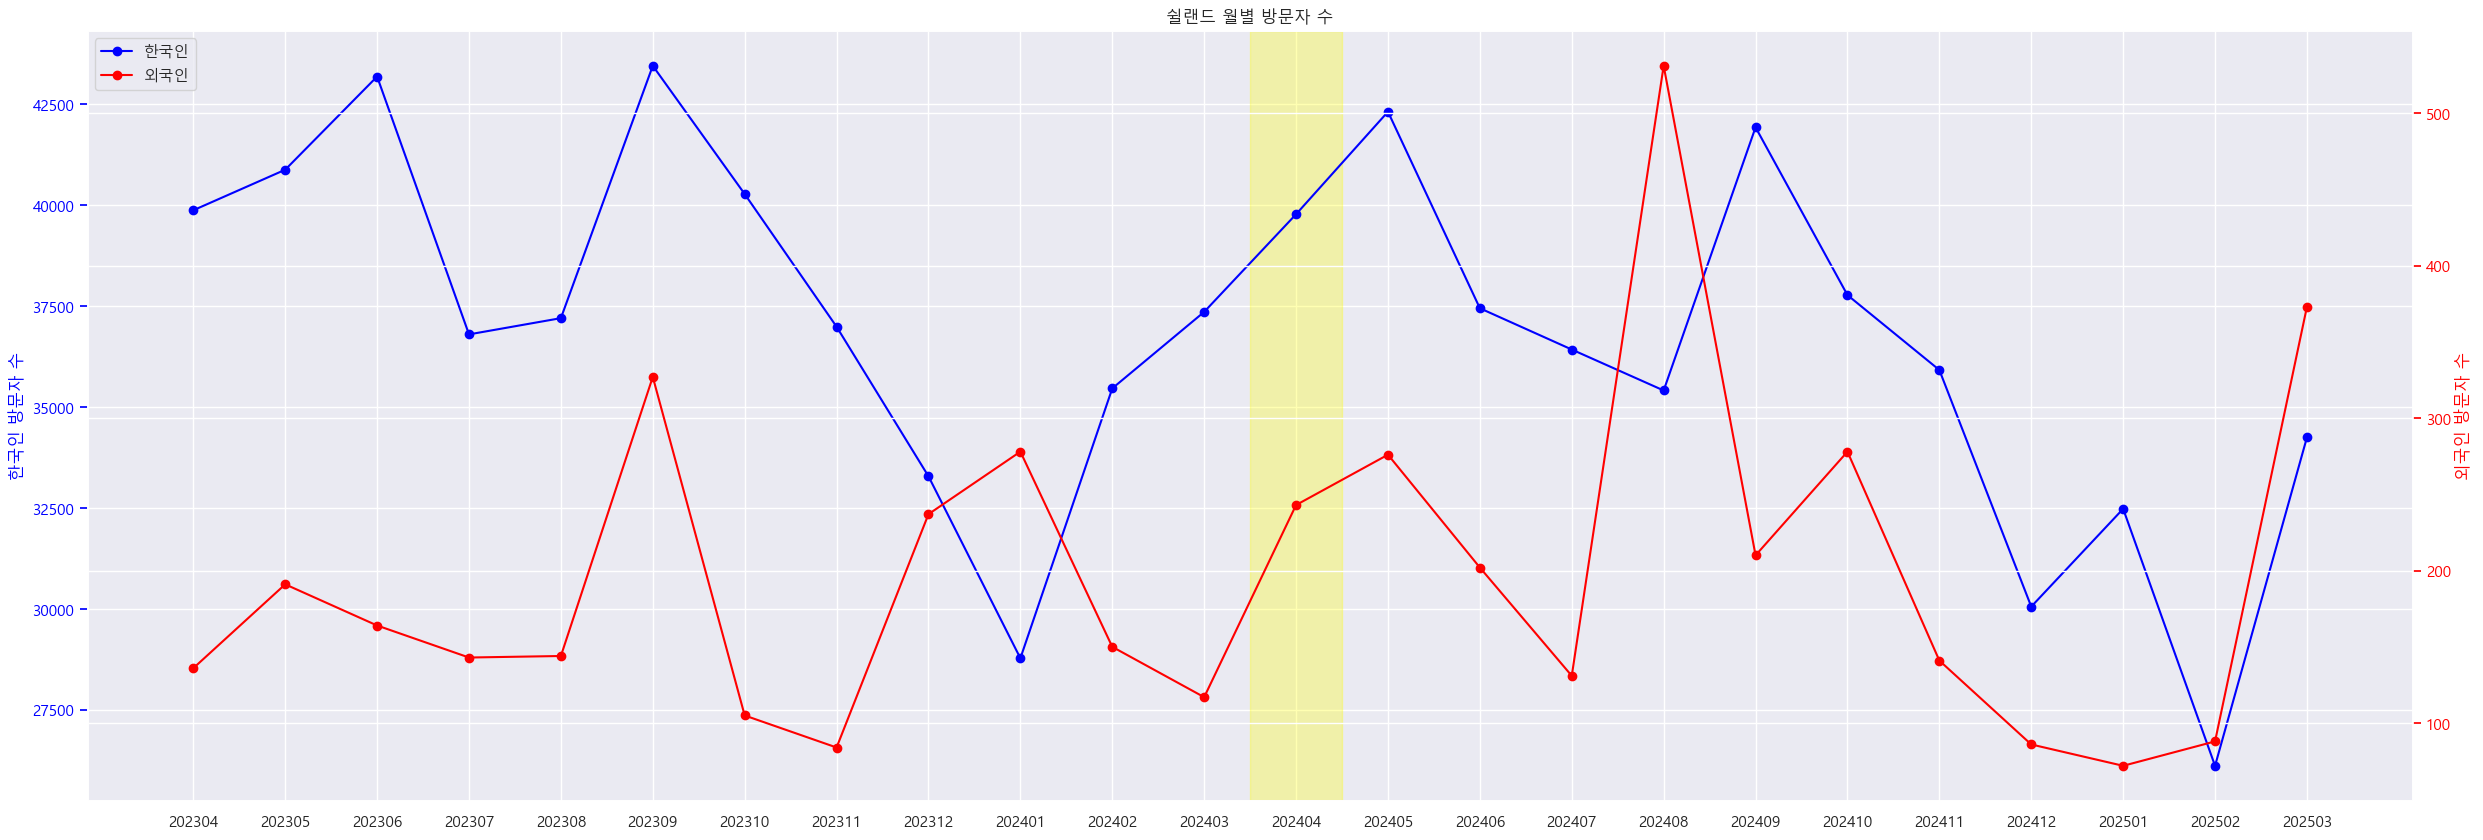

In [37]:
#쉴랜드
sld = visitor[visitor['시설이름'] == '쉴랜드']

# 2. 기준년월별 한국인/외국인 방문자 수 집계
monthly_visitor = (
    sld.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분', values='방문자 수')
    .astype(int)  # 정수로 변환
)

print(monthly_visitor)

# 3. 시각화 시작
fig, ax1 = plt.subplots(figsize=(30, 10))

# 왼쪽 y축: 한국인 방문자 수
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# y축 숫자 형식: 정수 고정
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')

# 오른쪽 y축: 외국인 방문자 수
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 오른쪽 y축도 정수 고정
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')

# 4. 그래프 제목
plt.title('쉴랜드 월별 방문자 수')

# 5. 특정 기준년월(202404) 하이라이트
highlight = '202404'
pos = list(monthly_visitor.index).index(highlight)
ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)

# 6. 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 7. 출력
plt.show()


방문자 구분     외국인     외지인      한국인     현지인
기준년월                                   
202304   58235  899720  1332734  433013
202305   63142  870982  1323438  452456
202306   69030  815066  1255023  439957
202307   75622  770063  1216008  445946
202308   87122  867206  1310358  443152
202309   83737  740929  1161923  420994
202310   83460  897130  1349124  451994
202311   65574  690588  1107152  416563
202312   67891  640724  1072862  432138
202401   75936  741114  1172997  431882
202402   88223  676550  1071770  395220
202403  105180  777868  1219152  441284
202404  129267  822546  1259531  436986
202405  119895  831128  1286425  455298
202406  112114  725448  1154972  429524
202407  121055  722274  1167971  445697
202408  143043  813592  1245538  431946
202409  112685  723524  1153344  429821
202410  133280  780367  1229599  449232
202411   72059  640906  1075610  434704
202412   69868  622346  1071934  449589
202501   66672  671436  1105198  433762
202502   62311  505852   894064  388213


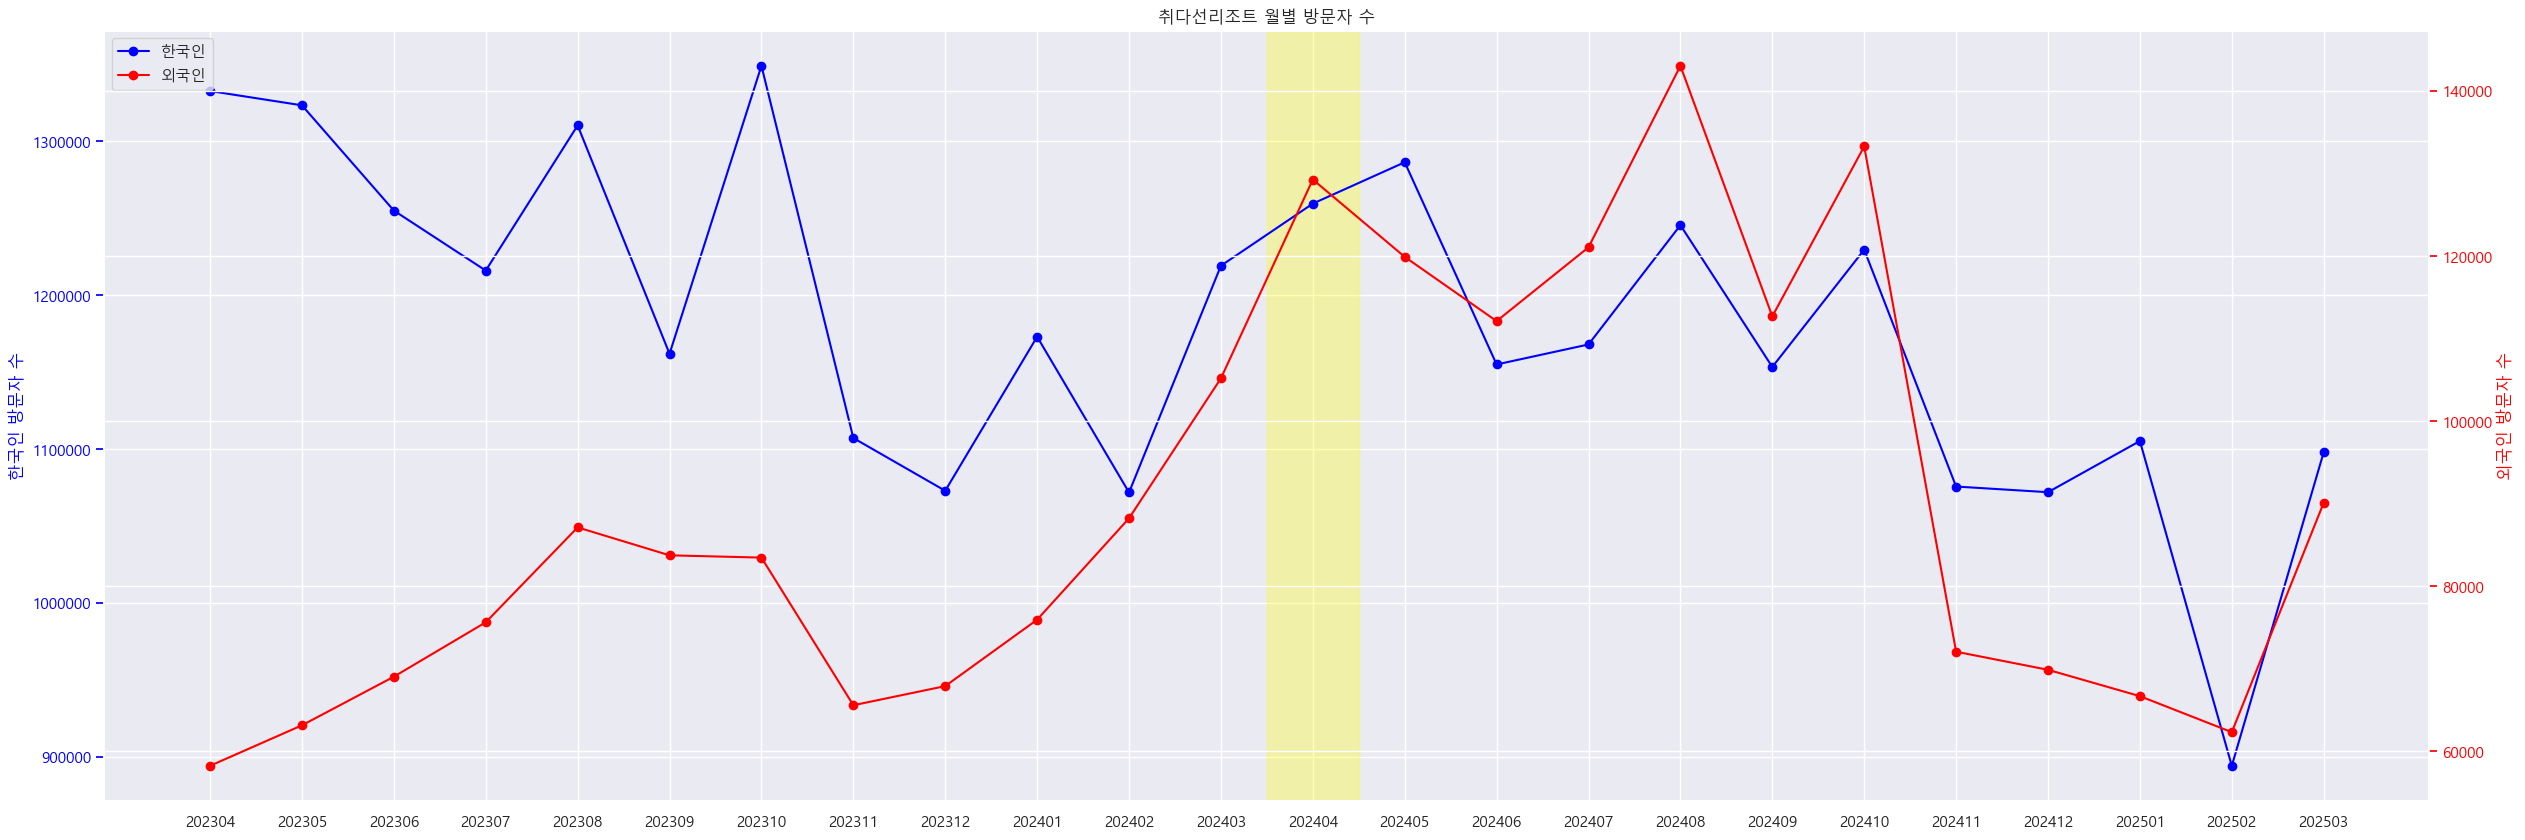

In [38]:
# 취다선리조트
cd = visitor[visitor['시설이름'] == '취다선리조트']

# 2. 기준년월별 한국인/외국인 방문자 수 집계
monthly_visitor = (
    cd.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분', values='방문자 수')
    .astype(int)  # 정수로 변환
)

print(monthly_visitor)

# 3. 시각화 시작
fig, ax1 = plt.subplots(figsize=(30, 10))

# 왼쪽 y축: 한국인 방문자 수
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# y축 숫자 형식: 정수 고정
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')

# 오른쪽 y축: 외국인 방문자 수
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 오른쪽 y축도 정수 고정
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')

# 4. 그래프 제목
plt.title('취다선리조트 월별 방문자 수')

# 5. 특정 기준년월(202404) 하이라이트
highlight = '202404'
pos = list(monthly_visitor.index).index(highlight)
ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)

# 6. 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 7. 출력
plt.show()


방문자 구분    외국인     외지인      한국인     현지인
기준년월                                  
202304  16539  483917  1172885  688968
202305  18956  501357  1234261  732903
202306  20881  439775  1147332  707557
202307  26720  456554  1177649  721095
202308  23078  496979  1223201  726222
202309  23828  395388  1068074  672686
202310  36579  499695  1236308  736614
202311  27054  406294  1119528  713234
202312  27677  379040  1109448  730408
202401  33557  432404  1111565  679161
202402  34916  297714   821068  523355
202403  54387  354112   953768  599655
202404  67747  361274   948563  587290
202405  66017  375522  1006159  630637
202406  66139  332584   936530  603946
202407  47639  378735  1022896  644161
202408  59980  422740  1056482  633742
202409  63087  342150   948644  606494
202410  55755  389232  1031152  641921
202411  36210  330288   930804  600516
202412  26949  310254   926779  616525
202501  30538  350018   930766  580748
202502  35368  278324   812770  534446
202503  40186  316830   9

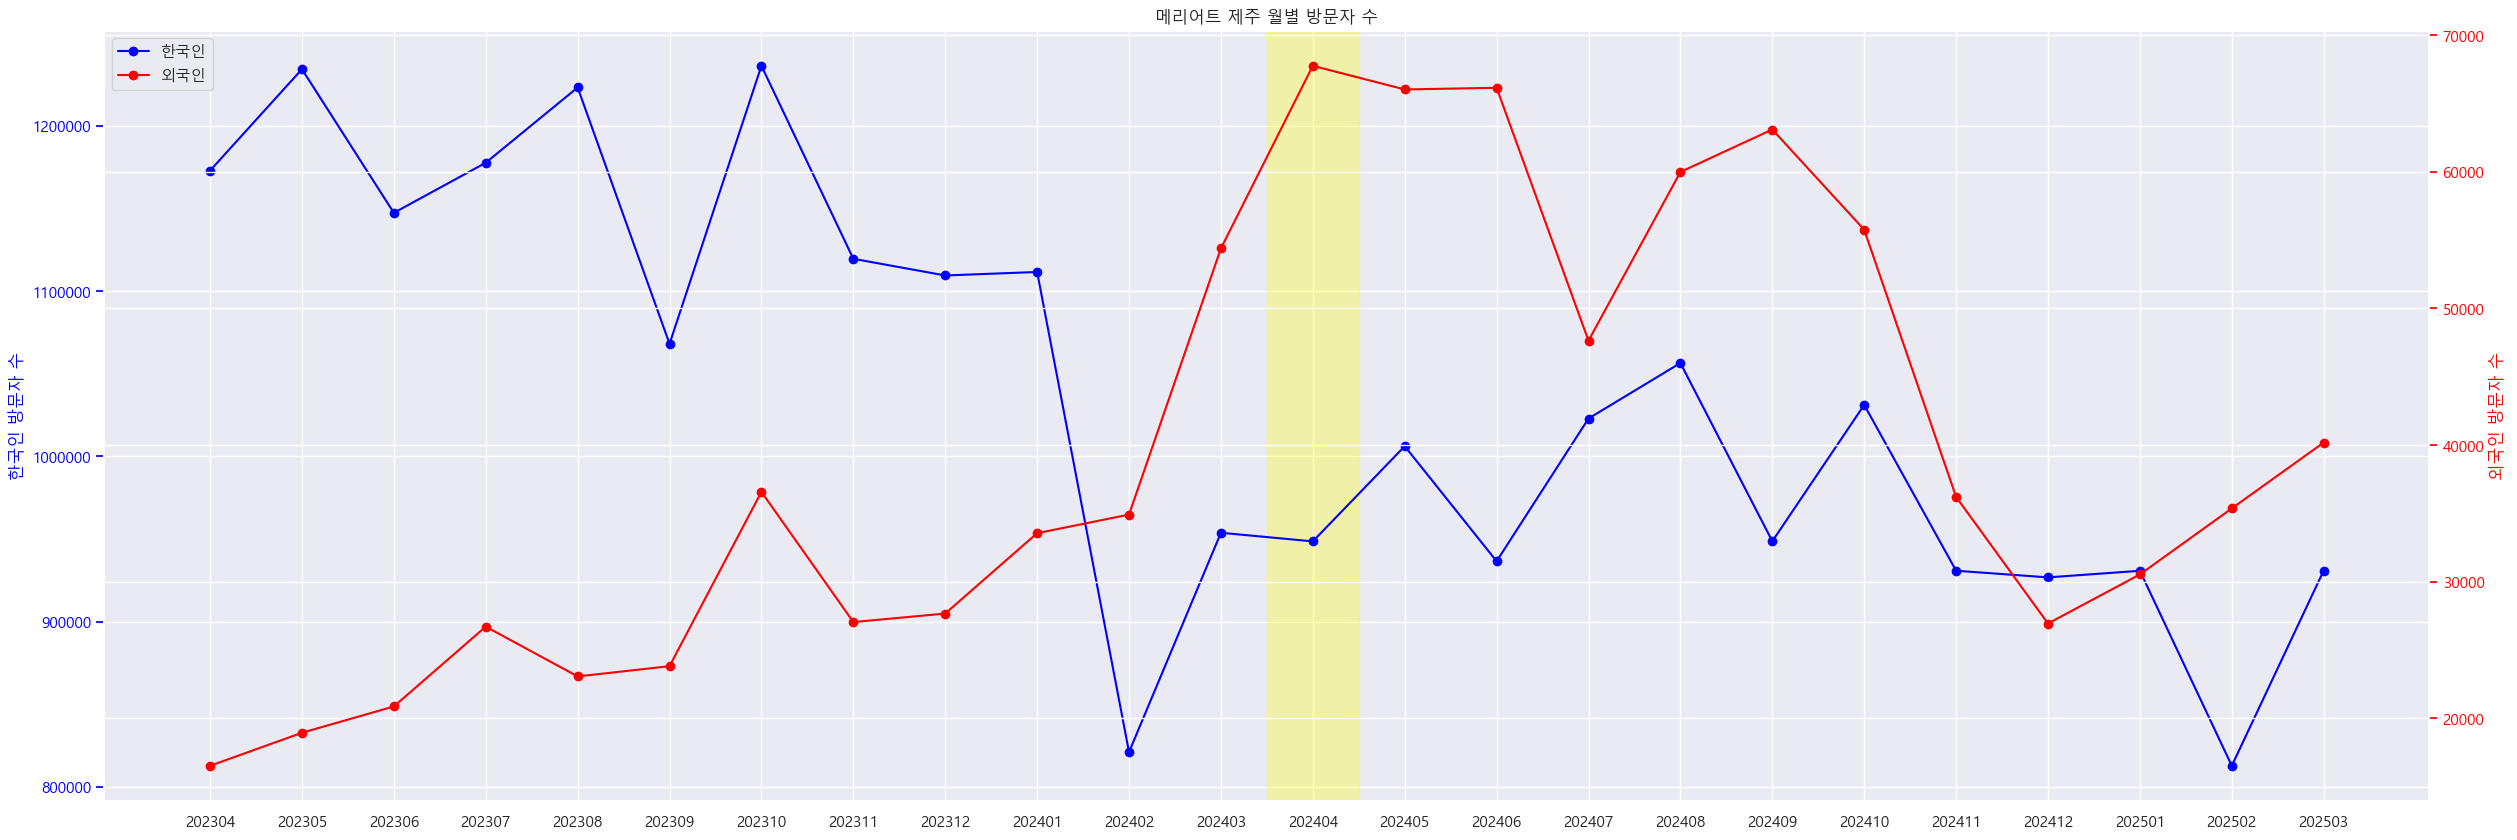

In [39]:
# 메리어트 제주
jw = visitor[visitor['시설이름'] == '메리어트제주']

# 2. 기준년월별 한국인/외국인 방문자 수 집계
monthly_visitor = (
    jw.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분', values='방문자 수')
    .astype(int)  # 정수로 변환
)

print(monthly_visitor)

# 3. 시각화 시작
fig, ax1 = plt.subplots(figsize=(30, 10))

# 왼쪽 y축: 한국인 방문자 수
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# y축 숫자 형식: 정수 고정
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')

# 오른쪽 y축: 외국인 방문자 수
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 오른쪽 y축도 정수 고정
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')

# 4. 그래프 제목
plt.title('메리어트 제주 월별 방문자 수')

# 5. 특정 기준년월(202404) 하이라이트
highlight = '202404'
pos = list(monthly_visitor.index).index(highlight)
ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)

# 6. 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 7. 출력
plt.show()


방문자 구분   외국인     외지인      한국인     현지인
기준년월                                 
202304  1201  247530   951678  704148
202305  1855  260264  1007538  747274
202306  1437  234804   945056  710252
202307  1491  241150   938612  697462
202308  1438  291746   986122  694376
202309  1262  269087   930741  661654
202310  2202  257852  1002001  744149
202311  1391  211575   938098  726523
202312  1253  203189   916440  713251
202401  1154  217774   903882  686108
202402  1110  224777   853727  628950
202403  1719  235084   938049  702964
202404  1786  216906   907736  690830
202405  2340  259486   994704  735217
202406  1592  221518   917224  695706
202407  2429  226398   940023  713626
202408  1562  273990   969272  695282
202409  1646  283742   974914  691173
202410  3498  240768   976672  735903
202411  1651  228652   950246  721595
202412  1515  198912   916160  717248
202501  1238  246064   901926  655862
202502   859  169642   783380  613739
202503  1414  232074   908974  676900


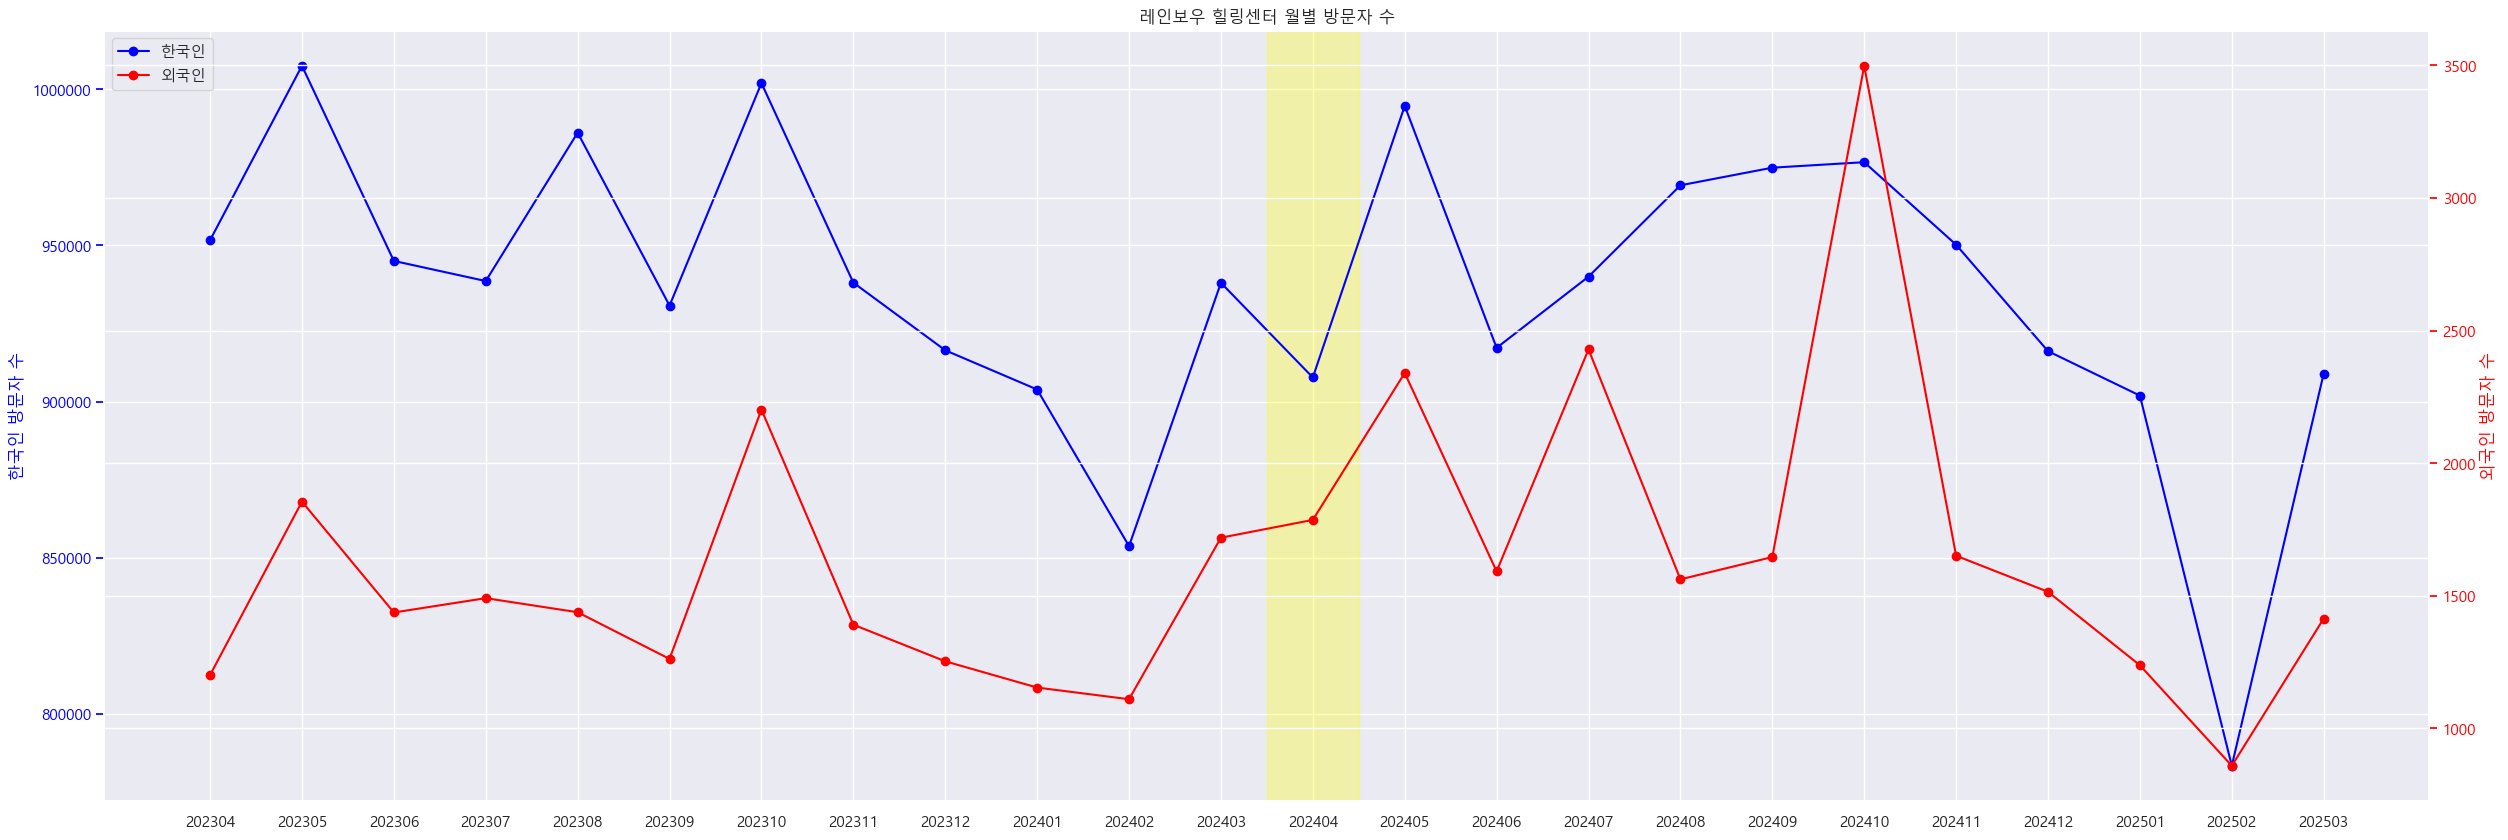

In [40]:
# 레인보우힐링센터
rain = visitor[visitor['시설이름'] == '레인보우힐링센터']

# 2. 기준년월별 한국인/외국인 방문자 수 집계
monthly_visitor = (
    rain.groupby(['기준년월', '방문자 구분'])['방문자 수']
    .sum()
    .reset_index()
    .pivot(index='기준년월', columns='방문자 구분', values='방문자 수')
    .astype(int)  # 정수로 변환
)

print(monthly_visitor)

# 3. 시각화 시작
fig, ax1 = plt.subplots(figsize=(30, 10))

# 왼쪽 y축: 한국인 방문자 수
ax1.plot(monthly_visitor.index, monthly_visitor['한국인'], marker='o', color='blue', label='한국인')
ax1.set_ylabel('한국인 방문자 수', color='blue')
ax1.tick_params(axis='y', colors='blue')

# y축 숫자 형식: 정수 고정
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')

# 오른쪽 y축: 외국인 방문자 수
ax2 = ax1.twinx()
ax2.plot(monthly_visitor.index, monthly_visitor['외국인'], marker='o', color='red', label='외국인')
ax2.set_ylabel('외국인 방문자 수', color='red')
ax2.tick_params(axis='y', colors='red')

# 오른쪽 y축도 정수 고정
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')

# 4. 그래프 제목
plt.title('레인보우 힐링센터 월별 방문자 수')

# 5. 특정 기준년월(202404) 하이라이트
highlight = '202404'
pos = list(monthly_visitor.index).index(highlight)
ax1.axvspan(pos - 0.5, pos + 0.5, color='yellow', alpha=0.3)

# 6. 범례 합치기
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 7. 출력
plt.show()
